# DSCI 100: Introduction to Data Science

## Tutorial 6 - Classification I  (Training & predicting): Class activity
Consider the `penguins` dataset from the `palmerspenguins` package:

In [6]:
options(repr.matrix.max.rows = 6)
library(palmerpenguins)
penguins

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Chinstrap,Dream,49.6,18.2,193,3775,male,2009
Chinstrap,Dream,50.8,19.0,210,4100,male,2009
Chinstrap,Dream,50.2,18.7,198,3775,female,2009


Suppose we are given a new, unclassified penguin with

- `bill_length_mm` = 40
- `bill_depth_mm` = 18

Using R and the `tidymodels` package, how would you classify this penguin's species based on the $k=3$ nearest neighbours?

First, load the necessary libraries (we need `tidyverse` and `tidymodels`)

In [7]:
library(tidyverse)
library(tidymodels)

Next, create a scatterplot to explore the relationship between the predictors/explanatory variables and the target variable.

Warning message:
“Removed 2 rows containing missing values (geom_point).”


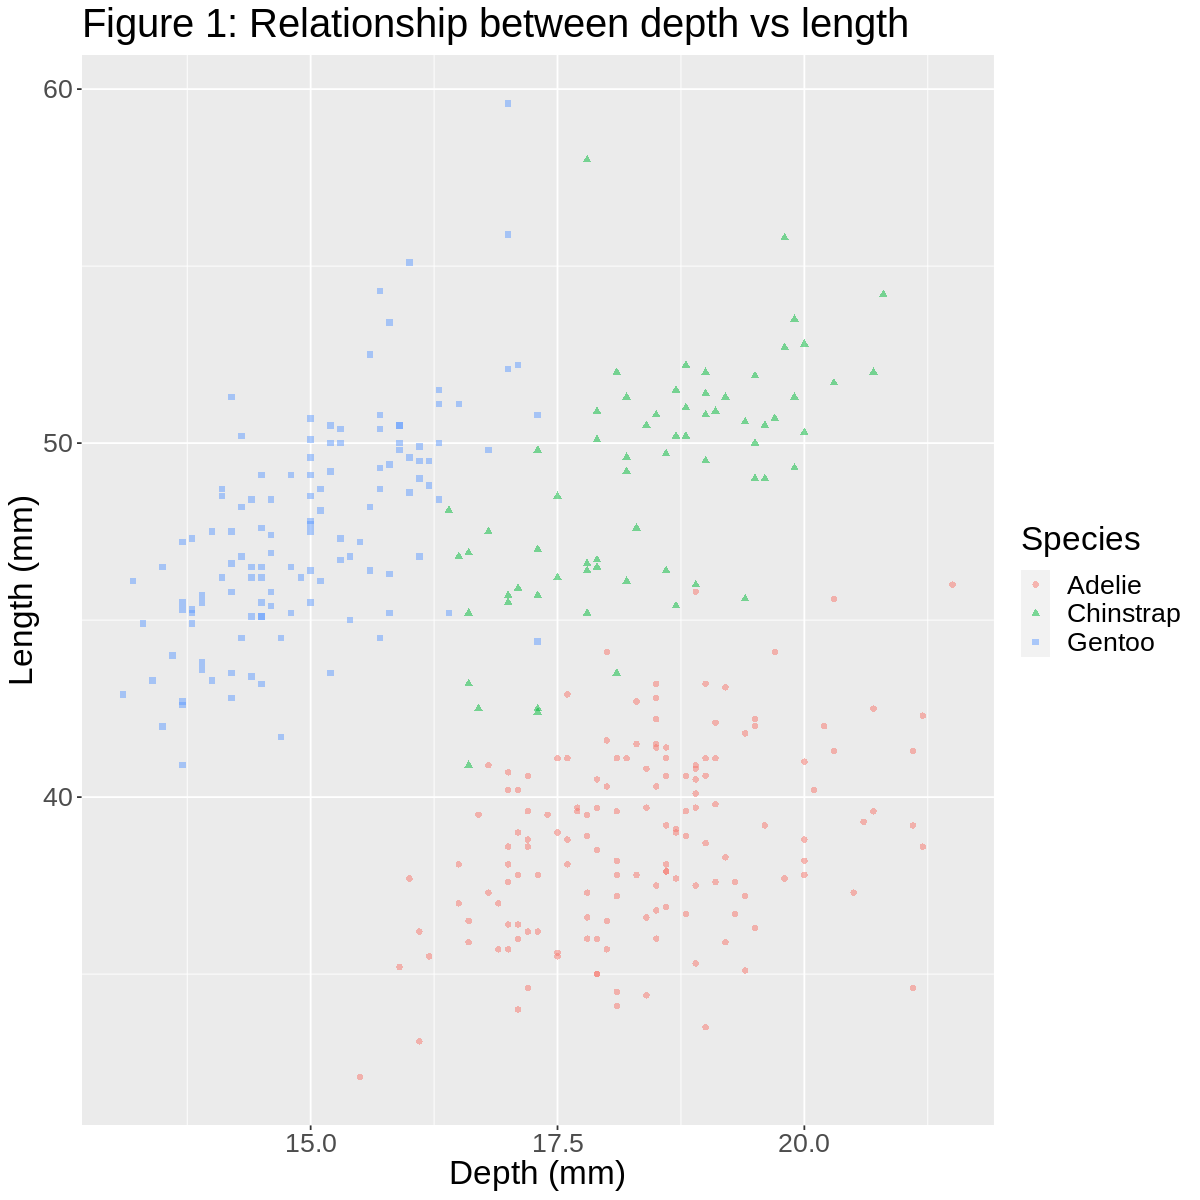

In [8]:
options(repr.plot.width = 10, repr.plot.height = 10)
penguins_plot <- penguins%>%
    ggplot(aes(x = bill_depth_mm, y = bill_length_mm, color = species, shape = species)) +
    geom_point(alpha = 0.5) +
    labs(x = "Depth (mm)", y = "Length (mm)", color = "Species", shape = "Species") +
    ggtitle("Figure 1: Relationship between depth vs length") +
    theme(text = element_text(size = 20))
penguins_plot


Next, make the tidymodels workflow for the analysis:

1. Make a recipe for our model. Include centering and scaling preprocessing steps
2. Make the model specification. Use 3 neighbours.
3. Combine them in a workflow.

In [9]:
penguins_class_nb <- penguins %>%
    group_by(species) %>%
    summarize(count = n(), percentage = n()*100/nrow(penguins))
penguins_class_nb

`summarise()` ungrouping output (override with `.groups` argument)



species,count,percentage
<fct>,<int>,<dbl>
Adelie,152,44.18605
Chinstrap,68,19.76744
Gentoo,124,36.04651


In [10]:
# Set the seed. Don't remove this!
set.seed(9999) 

# Make a recipe
penguins_recipe <- recipe(species ~ bill_depth_mm + bill_length_mm, data = penguins) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

# Define a model
penguins_model <- nearest_neighbor(weight = 'rectangular', neighbors = 3) %>%
    set_engine('kknn') %>%
    set_mode('classification')

# Put recipe and model into workflow
penguins_workflow <- workflow() %>%
    add_model(penguins_model) %>%
    add_recipe(penguins_recipe)



Now train the model using the `fit` function.


In [11]:
penguins_fit <- fit(penguins_workflow, data = penguins)

Finally, predict the label for the new observation.

In [12]:
new_obs <- tibble(bill_depth_mm = 18, bill_length_mm = 40)
new_obs

bill_depth_mm,bill_length_mm
<dbl>,<dbl>
18,40


In [13]:
predict(penguins_fit, new_obs)

.pred_class
<fct>
Adelie
